In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# connect to the dataset
myData = './data/pima-diabetes.csv'
pima = pd.read_csv(myData)

## Prepping data

In [2]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


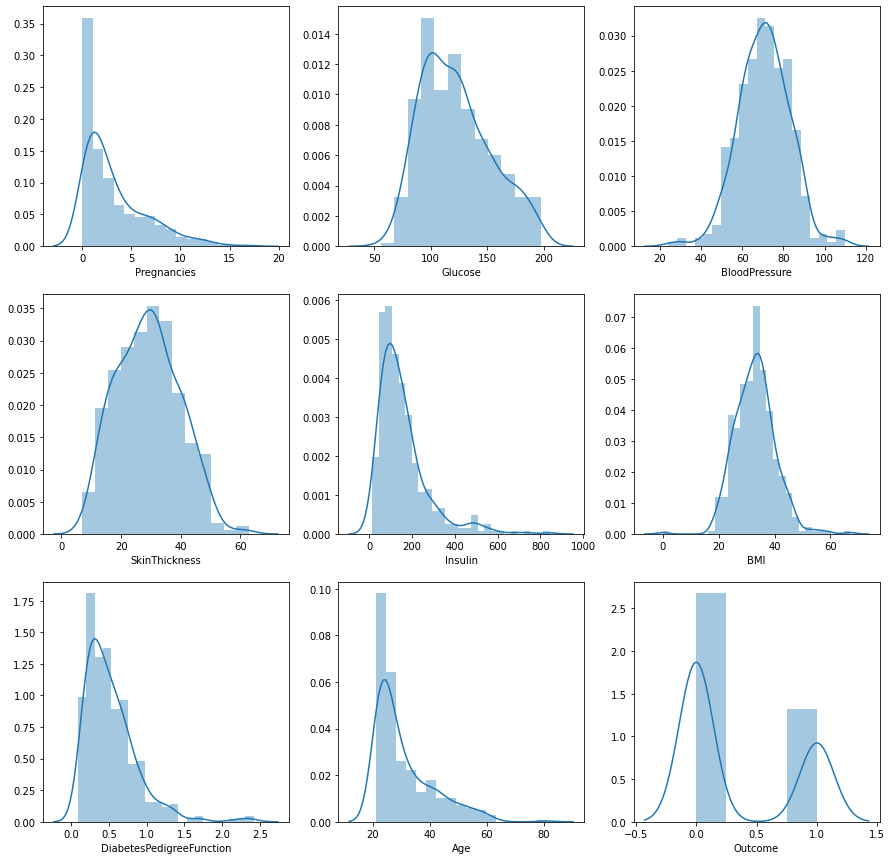

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3)

fig.set_figheight(15)
fig.set_figwidth(15)

for i, column in enumerate(pima.columns):
    sns.kdeplot(pima[column], shade=True, ax=axes[i//3,i%3])

In [26]:
# clean the data
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Age','Insulin']
for col in cols_to_clean:
    pima = pima.drop(pima.index[pima[col] == 0])
    
len(pima)

393

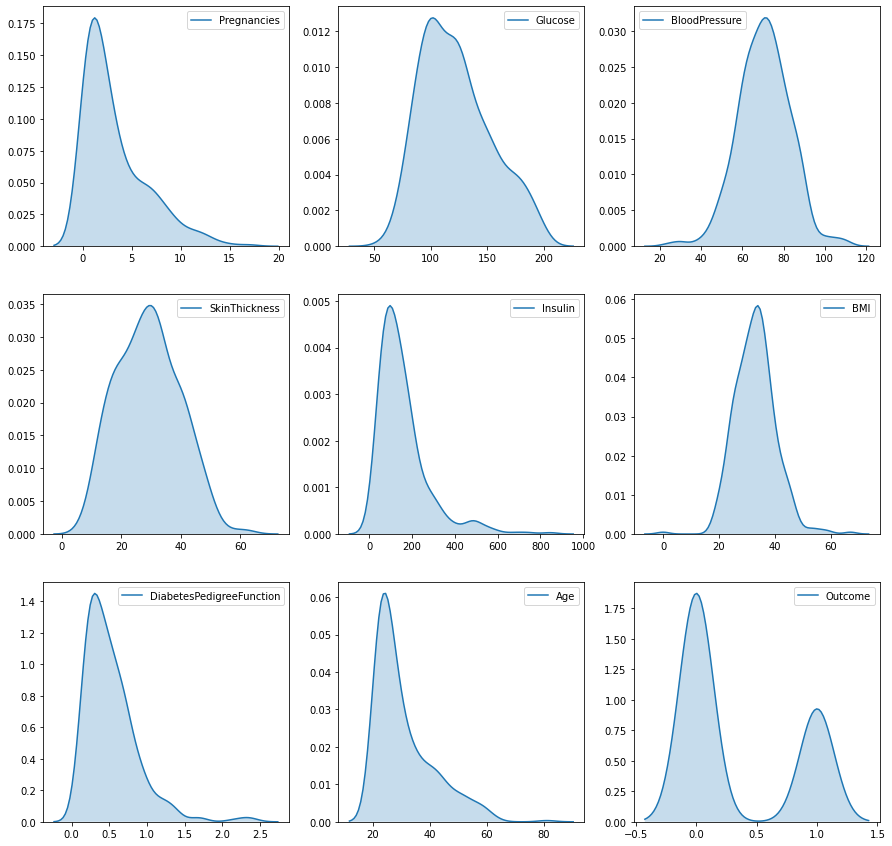

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=3)

fig.set_figheight(15)
fig.set_figwidth(15)

for i, column in enumerate(pima.columns):
    sns.kdeplot(pima[column], shade=True, ax=axes[i//3,i%3])

In [6]:
# check for class imbalance
round(len(pima[pima['Outcome'] != 0]) / len(pima),3) * 100

33.1

In [7]:
X = pima.drop('Outcome', axis=1)
y = pima['Outcome']

# create training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## SVM

In [21]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
740,11,120,80,37,150,42.3,0.785,48
223,7,142,60,33,190,28.8,0.687,61
420,1,119,88,41,170,45.3,0.507,26
204,6,103,72,32,190,37.7,0.324,55
763,10,101,76,48,180,32.9,0.171,63


In [24]:
from math import copysign

In [ ]:
def gradient_descent():
    '''
    Homebrew gradient descent
    
    '''

    
    


## Decision Trees

In [8]:
# decision tree
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)


In [9]:
print(round(accuracy_score(y_test, y_predict), 3))
# create a confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Diabetic', 'Predicted Diabetic'],
    index=['True Not Diabetic', 'True Diabetic']
)

0.717


,Predicted Not Diabetic,Predicted Diabetic
True Not Diabetic,56,15
True Diabetic,13,15


In [10]:
best_depth = 1
best_result = 0
best_model = None

for depth in range(2,7):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)

    result = round(accuracy_score(y_test, y_predict), 3)
    
    print("At depth %s, we had accuracy of %s" % (depth, result))
    if result >= best_result:
        best_depth = depth
        best_result = result
        best_model = model
    
    
# create a confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, best_model.predict(X_test)),
    columns=['Predicted Not Diabetic', 'Predicted Diabetic'],
    index=['True Not Diabetic', 'True Diabetic']
)


At depth 2, we had accuracy of 0.727
At depth 3, we had accuracy of 0.758
At depth 4, we had accuracy of 0.788
At depth 5, we had accuracy of 0.717
At depth 6, we had accuracy of 0.707


,Predicted Not Diabetic,Predicted Diabetic
True Not Diabetic,56,15
True Diabetic,6,22


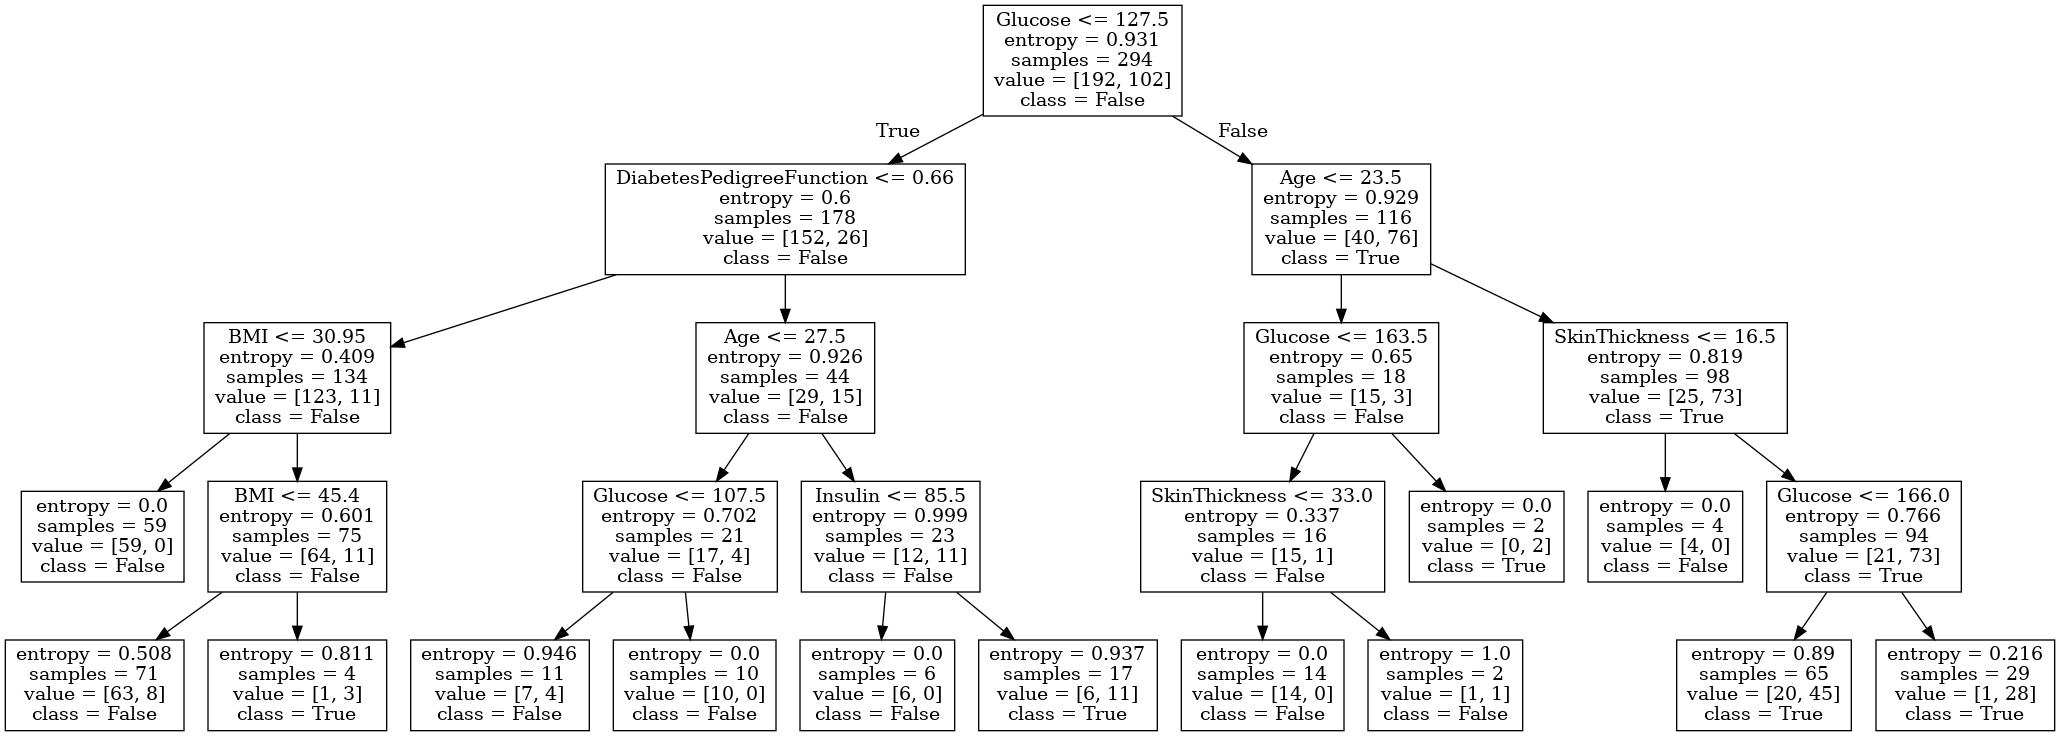

In [17]:
# fig, ax = plt.subplots(figsize=(25, 25))
# tree.plot_tree(best_model, fontsize = 12)
import pydotplus
from IPython.display import Image
from os import remove

dot_file = "pima_diabetes_dtree.dot"

features = pima.drop('Outcome', axis=1).columns
tree.export_graphviz(best_model, out_file=dot_file,  
                     feature_names= features ,  
                     class_names=['False', 'True'])  

graph = pydotplus.graphviz.graph_from_dot_file(dot_file)  
remove(dot_file)
Image(graph.create_png())

## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_predict = gnb.fit(X_train, y_train).predict(X_test)


In [13]:
print(round(accuracy_score(y_test, y_predict), 3))
# create a confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Diabetic', 'Predicted Diabetic'],
    index=['True Not Diabetic', 'True Diabetic']
)

0.737


,Predicted Not Diabetic,Predicted Diabetic
True Not Diabetic,53,18
True Diabetic,8,20
